# Reading and Drawing Pictures

In [3]:
class JJCV_Read_Draw():
    """
    ## Description
    JJCV_Read_Draw() is used for (1) reading image (2) drawing image
    Input: cmap
    
    ## Public methods:
    1. read_and_draw
        Input 
            (String) img_path
            (String) mode
        Output
            (Numpy Array) img
    
    2. common_plot
        Input
            (Numpy Array) img
            (Boolean) axis_toggle
        Output
            Nothing
    
    3. common_read
        Input
            (String) img_path
            (String) mode
        Output
            (Numpy Array) img
            
    ## Private methods:
    1. private_jj_imread
        Input
            (String) img_path
        Output
            (Numpy Array) img
        
    2. private_get_center_area
        Input
            (Numpy Array) img
            (Integer) img_size
            (Integer) center_size
        Output
            (Numpy Array) img
    """
    def __init__(self, cmap):
        self.cmap = cmap
    
    def common_read(self, img_path, mode):
        if mode == "bmp":
            img = cv.imread(img_path)[:,:,0]
        elif mode == "raw":
            img = self.private_jj_imread(img_path)
        return img
    
    def common_draw(self, img, axis_toggle):
        plt.figure(figsize=(5,5))
        plt.imshow(img, cmap=self.cmap)
        if axis_toggle:
            plt.axis("off")
        plt.show()
            
    def read_and_draw(self, img_path, mode):

        img = self.common_read(img_path, mode)
        self.common_draw(img, True)
        self.common_draw(self.private_get_center_area(img, 512,10), True)
        
        return np.array(img)

    def private_jj_imread(self, img_path):
        img = np.empty((512, 512), np.uint8)
        file = open(img_path, "rb").read()

        for x in range(512):
            for y in range(512):
                img[x, y] = file[x * 512 + y]
        return img

    # for square
    def private_get_center_area(self, img, img_size, center_size):
        mid = float(img_size)/2.
        half = center_size/2
        upper_bound = int(mid) + int(half) 
        lower_bound = int(mid) - int(half)
        return img[lower_bound:upper_bound, lower_bound:upper_bound]
    
    # for rectangle
    def private_get_center_area_2(self, img, img_height, img_width, center_size):
        vertical_mid = float(img_height)/2.
        horizontal_mid = float(img_width)/2.
        half = center_size/2
        
        vertical_upper_bound = int(vertical_mid) + int(half) 
        vertical_lower_bound = int(vertical_mid) - int(half)
        
        horizontal_upper_bound = int(horizontal_mid) + int(half) 
        horizontal_lower_bound = int(horizontal_mid) - int(half)
        return img[vertical_lower_bound:vertical_upper_bound, horizontal_lower_bound:horizontal_upper_bound]

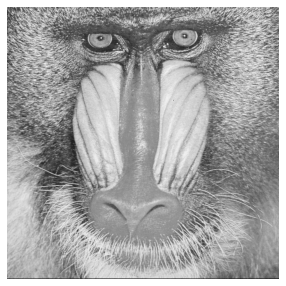

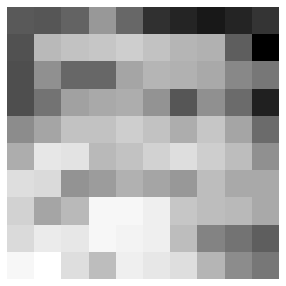

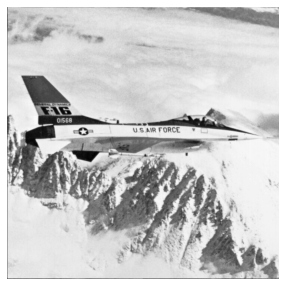

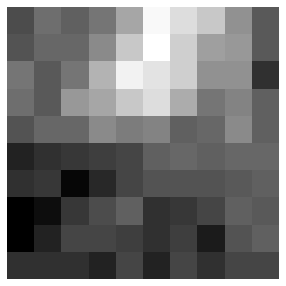

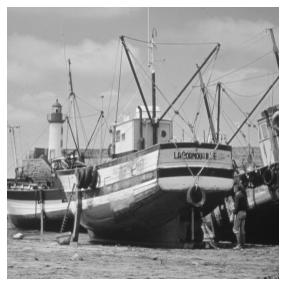

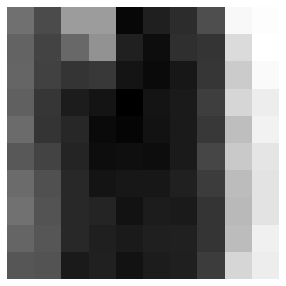

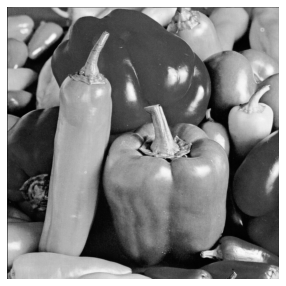

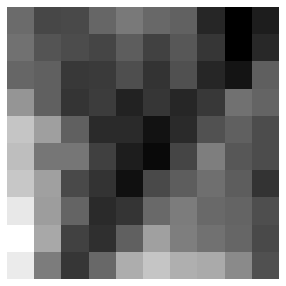

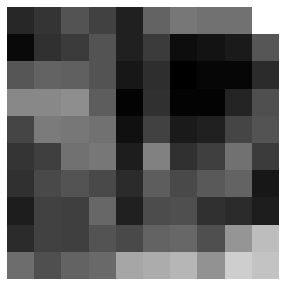

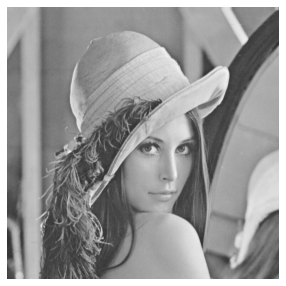

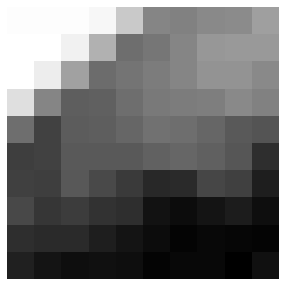

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

jjcv_rd = JJCV_Read_Draw(cmap="gray")
BASE_DIR = "../Data/Hw1/data/"
FILENAME_LIST = ["baboon.bmp", "F16.bmp", "boat.bmp", "peppers.raw", "goldhill.raw", "lena.raw"]

for fname in FILENAME_LIST:
    fname = f"{BASE_DIR}{fname}"
    mode = fname[-3:]
    jjcv_rd.read_and_draw(fname, mode)

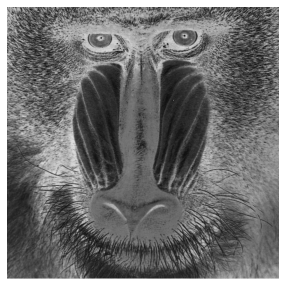

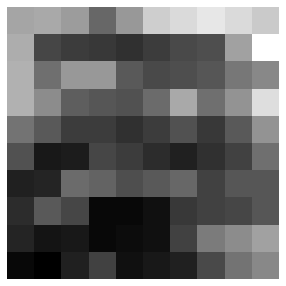

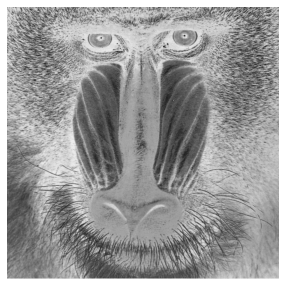

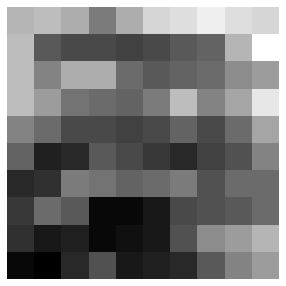

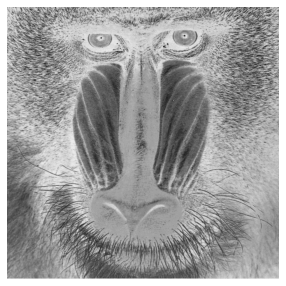

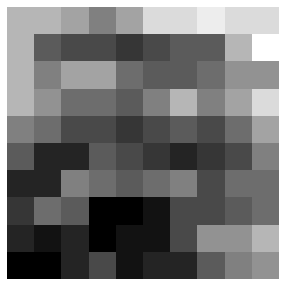

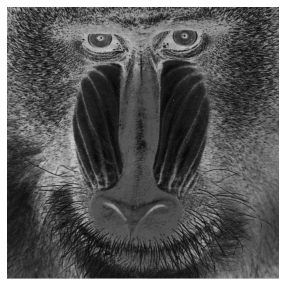

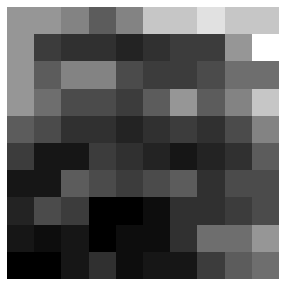

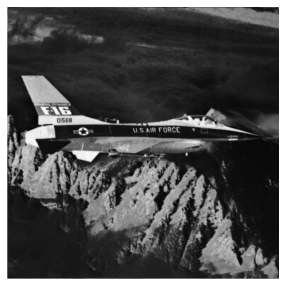

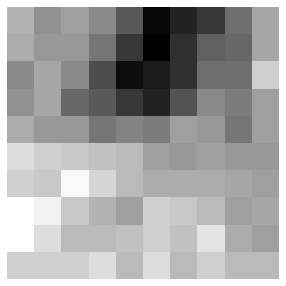

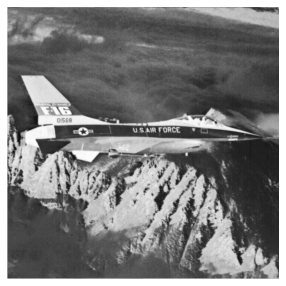

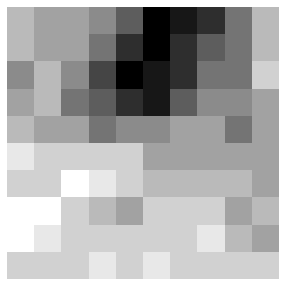

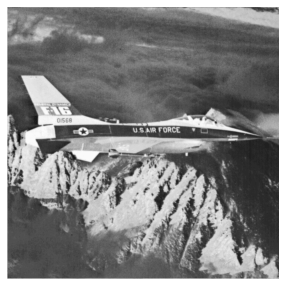

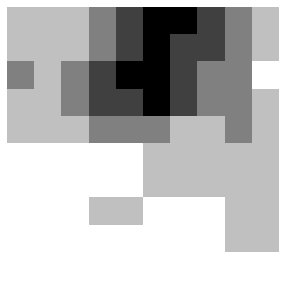

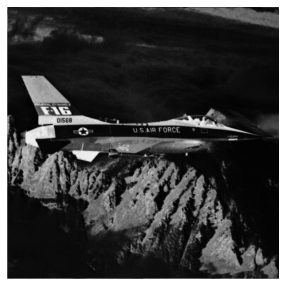

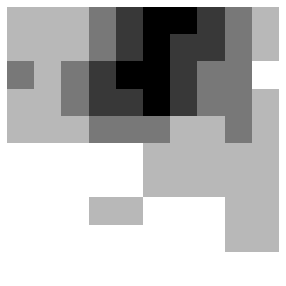

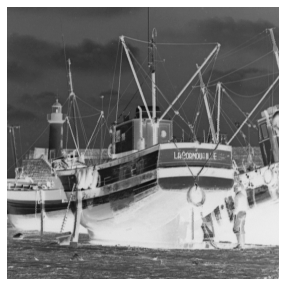

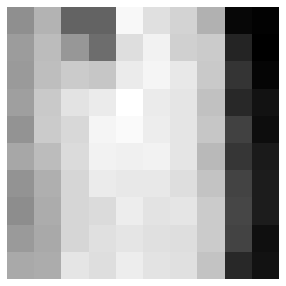

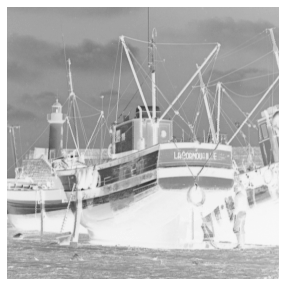

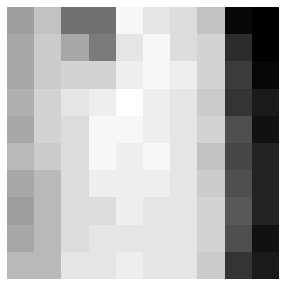

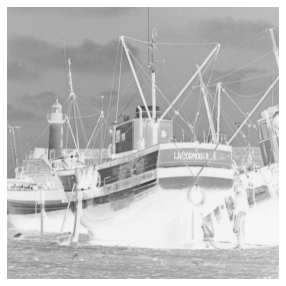

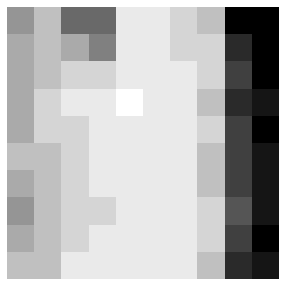

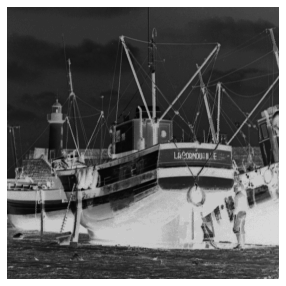

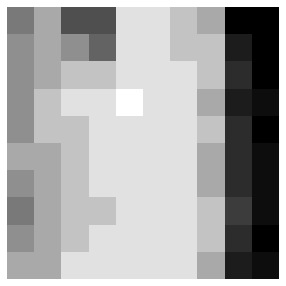

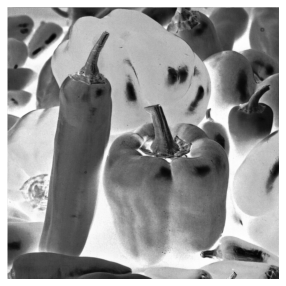

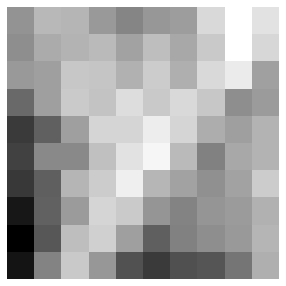

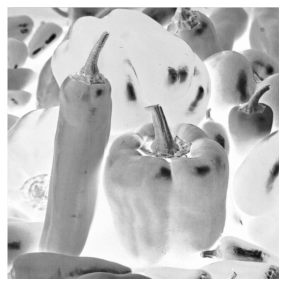

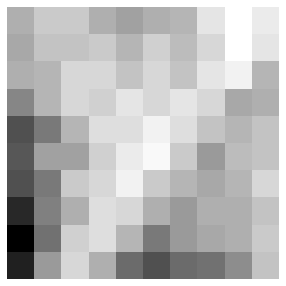

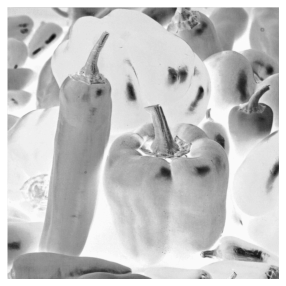

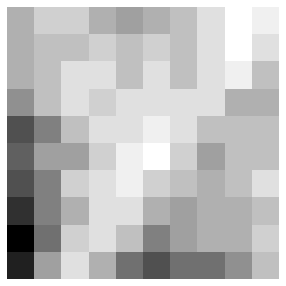

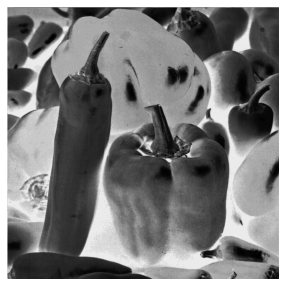

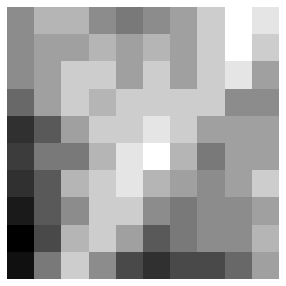

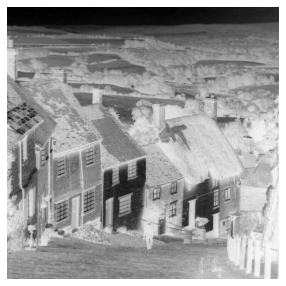

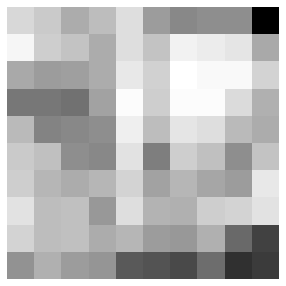

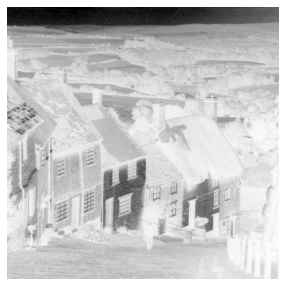

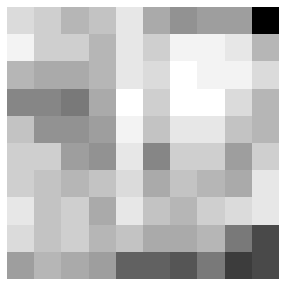

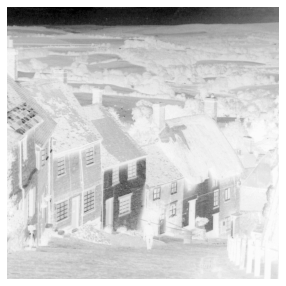

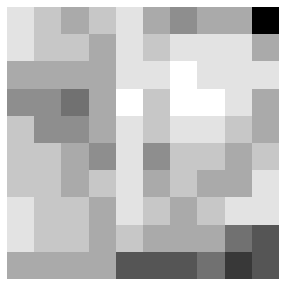

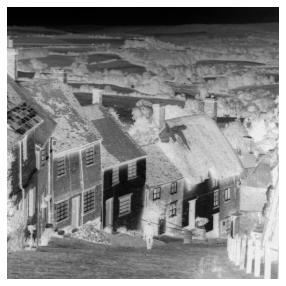

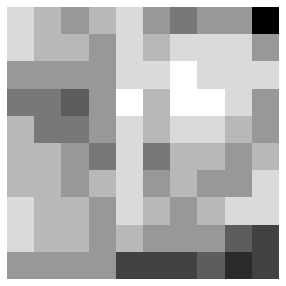

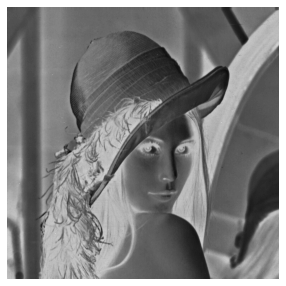

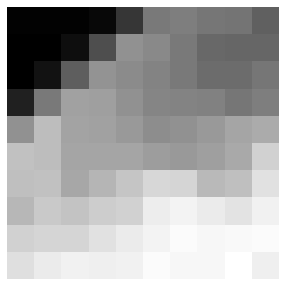

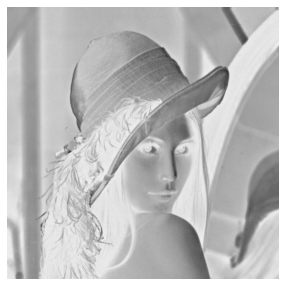

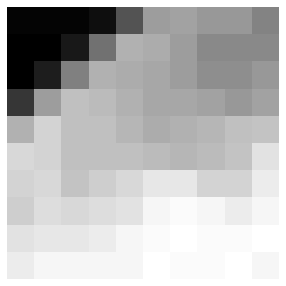

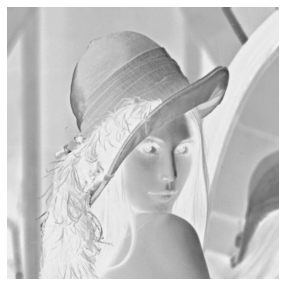

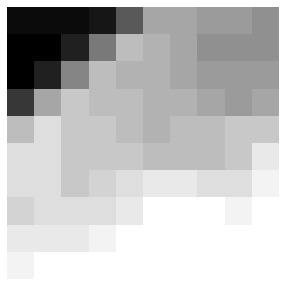

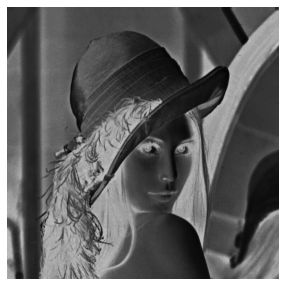

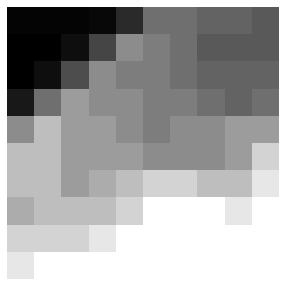

In [5]:
class JJCV_Enhance(JJCV_Read_Draw):
    """
    ## Description
    JJCV_Enhance() is used for (point-wisely) enhancing image
    Input: cmap
    
    ## Public methods:
    1. image_negative
        Input 
            (Numpy Array) img
        Output
            (Numpy Array) img
    
    2. log_transform
        Input
            (Numpy Array) img
        Output
            (Numpy Array) img
    
    3. gamma_transform
        Input
            (Numpy Array) img
            (Int) gamma
        Output
            (Numpy Array) img
            
    ## Private methods:
        pass
    """
    def __init__(self, cmap):
        super().__init__(cmap)

    def image_negative(self, img):
        w, h = img.shape
        for x in range(w):
            for y in range(h):
                img[x, y] = 255 - img[x, y]
        self.common_draw(img, True)
        self.common_draw(self.private_get_center_area(img, 512, 10), True)
        return img

    def log_transform(self, img):
        """ 
        s=c*log(r+1)
        s = output pixel
        r = input pixel
        c = 255/(log(1 + max_input_pixel_value))
        """
        c = 255/(np.log(1 + 255))
        w, h = img.shape
        for x in range(w):
            for y in range(h):
                img[x, y] = c * np.log(img[x, y] + 1)
        self.common_draw(img, True)
        self.common_draw(self.private_get_center_area(img, 512,10), True)
        return img   

    def gamma_transform(self, img, gamma):
        """
        s=c*r^γ
        s = output pixel
        r = input pixel
        c = 255*(img/255)
        gamma = 0.4 ~ 255
        """
        w, h = img.shape
        for x in range(w):
            for y in range(h):
                img[x, y] = 255 * (img[x, y]/255) ** gamma
        self.common_draw(img, True)
        self.common_draw(self.private_get_center_area(img, 512,10), True)
        return img   
    
jjcv_enhance = JJCV_Enhance(cmap="gray")

for fname in FILENAME_LIST:
    fname = f"{BASE_DIR}{fname}"
    mode = fname[-3:]
    img = jjcv_rd.common_read(fname, mode)
    
    # Tran 1: image negative
    img_enhance = jjcv_enhance.image_negative(img)
    
    #  Tran 2: log transform
    img_enhance = jjcv_enhance.log_transform(img)
    
    # Tran 3: gamma transform
    img_enhance = jjcv_enhance.gamma_transform(img, gamma=0.4)
    img_enhance = jjcv_enhance.gamma_transform(img, gamma=20)

After Nearest Neighbor Interpolation:(128, 128)


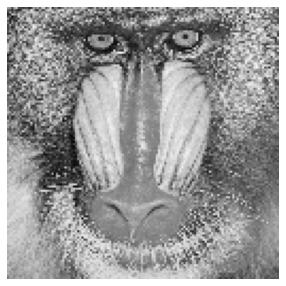

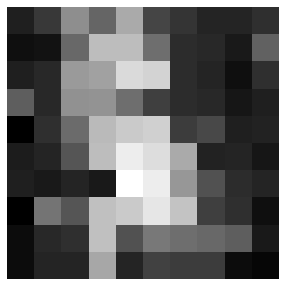

After Bilinear Interpolation:(128, 128)


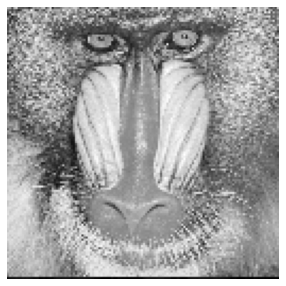

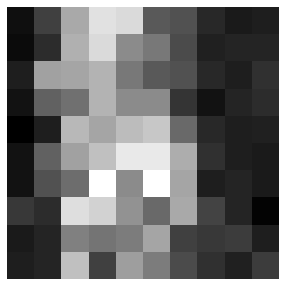

After Nearest Neighbor Interpolation:(32, 32)


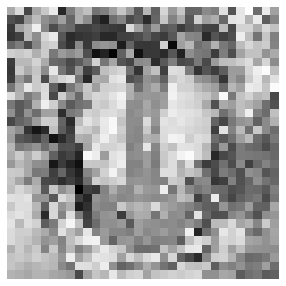

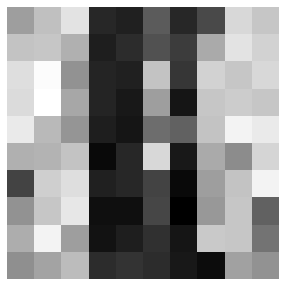

After Bilinear Interpolation:(32, 32)


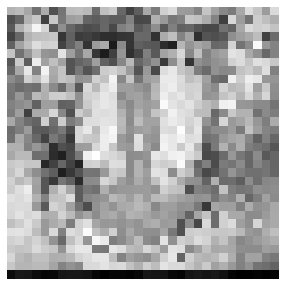

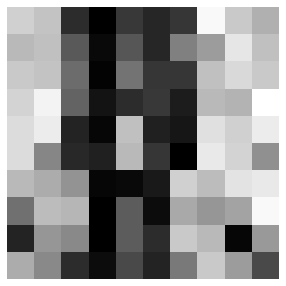

After Nearest Neighbor Interpolation:(1024, 512)


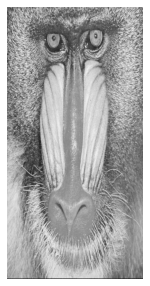

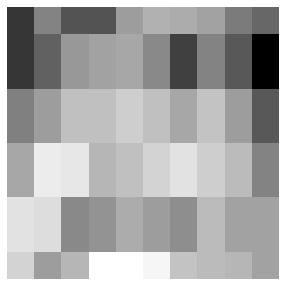

After Bilinear Interpolation:(1024, 512)


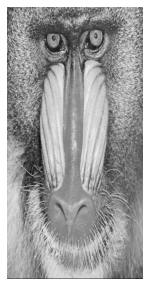

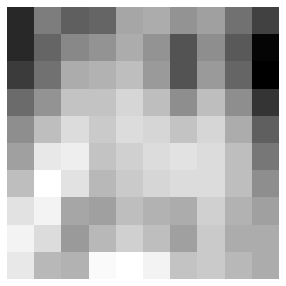

After Nearest Neighbor Interpolation:(128, 128)
After Nearest Neighbor Interpolation:(256, 512)
baboon_256x512_nearest_neighbor.jpg


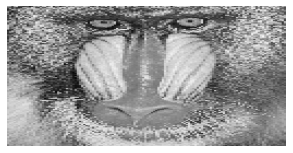

baboon_256x512_nearest_neighbor_center.jpg


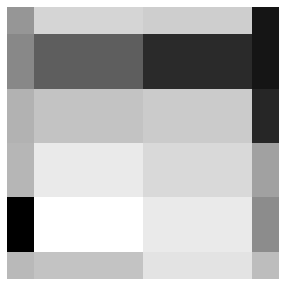

After Bilinear Interpolation:(128, 128)
After Bilinear Interpolation:(256, 512)
baboon_256x512_bilinear.jpg


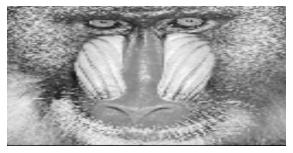

baboon_256x512_bilinear_center.jpg


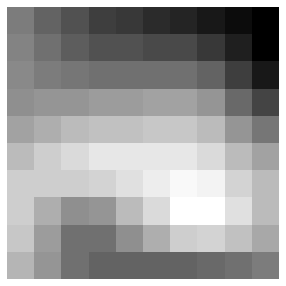

After Nearest Neighbor Interpolation:(32, 32)
After Nearest Neighbor Interpolation:(512, 512)
baboon_512x512_nearest_neighbor.jpg


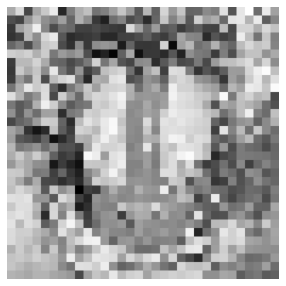

baboon_512x512_nearest_neighbor_center.jpg


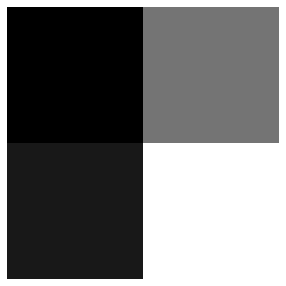

After Bilinear Interpolation:(32, 32)
After Bilinear Interpolation:(512, 512)
baboon_512x512_bilinear.jpg


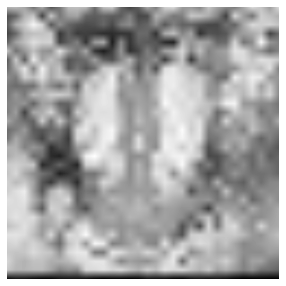

baboon_512x512_bilinear_center.jpg


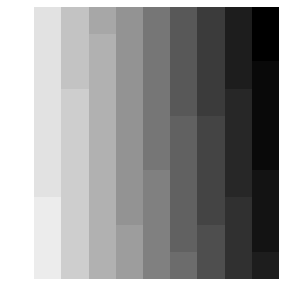

After Nearest Neighbor Interpolation:(128, 128)


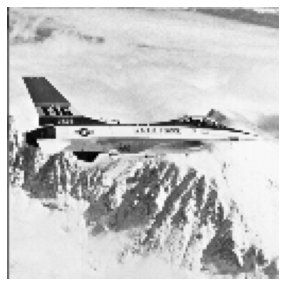

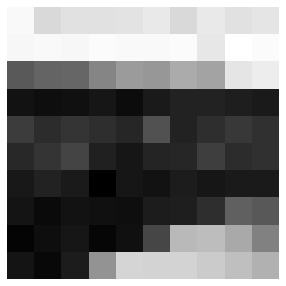

After Bilinear Interpolation:(128, 128)


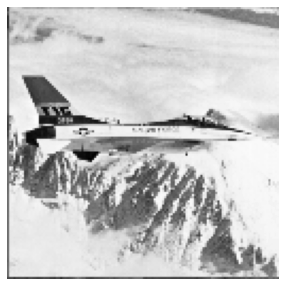

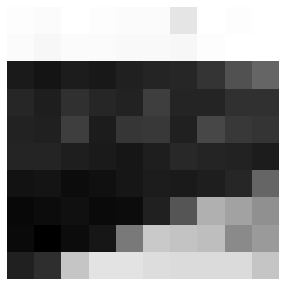

After Nearest Neighbor Interpolation:(32, 32)


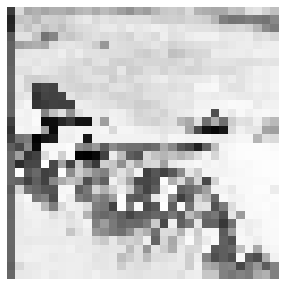

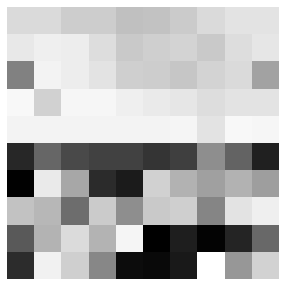

After Bilinear Interpolation:(32, 32)


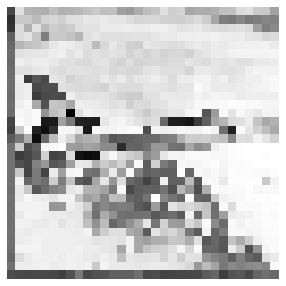

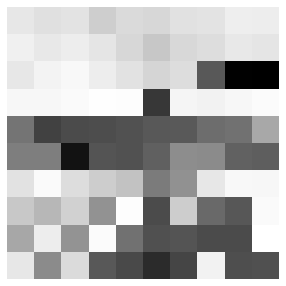

After Nearest Neighbor Interpolation:(1024, 512)


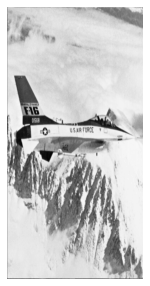

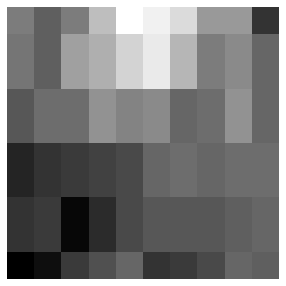

After Bilinear Interpolation:(1024, 512)


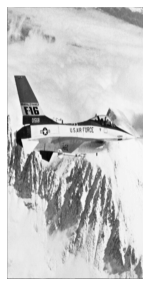

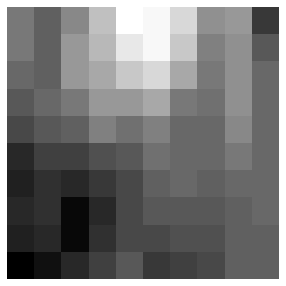

After Nearest Neighbor Interpolation:(128, 128)
After Nearest Neighbor Interpolation:(256, 512)
F16_256x512_nearest_neighbor.jpg


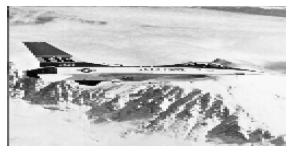

F16_256x512_nearest_neighbor_center.jpg


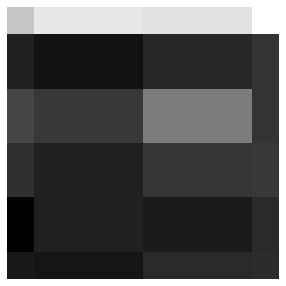

After Bilinear Interpolation:(128, 128)
After Bilinear Interpolation:(256, 512)
F16_256x512_bilinear.jpg


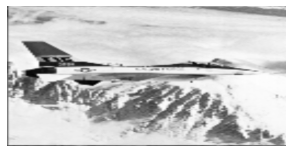

F16_256x512_bilinear_center.jpg


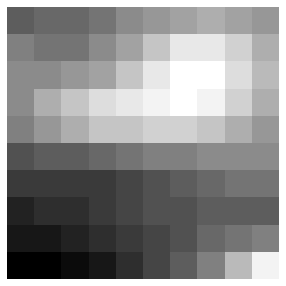

After Nearest Neighbor Interpolation:(32, 32)
After Nearest Neighbor Interpolation:(512, 512)
F16_512x512_nearest_neighbor.jpg


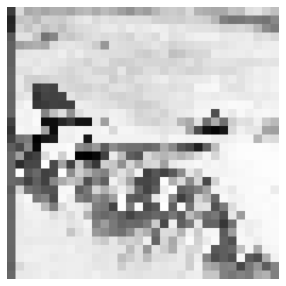

F16_512x512_nearest_neighbor_center.jpg


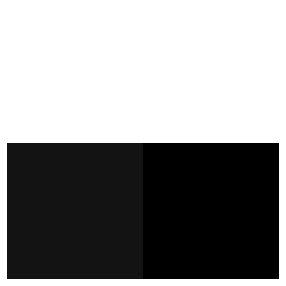

After Bilinear Interpolation:(32, 32)
After Bilinear Interpolation:(512, 512)
F16_512x512_bilinear.jpg


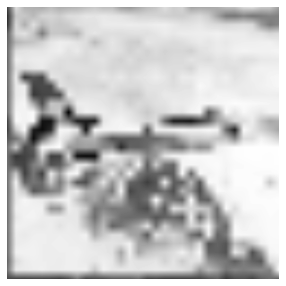

F16_512x512_bilinear_center.jpg


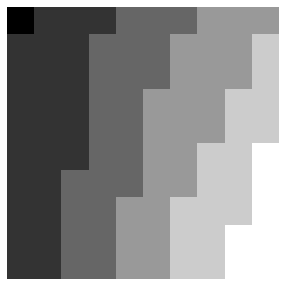

After Nearest Neighbor Interpolation:(128, 128)


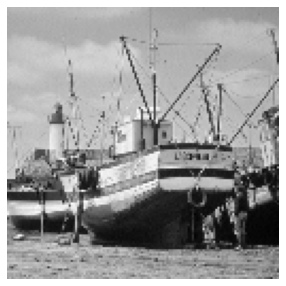

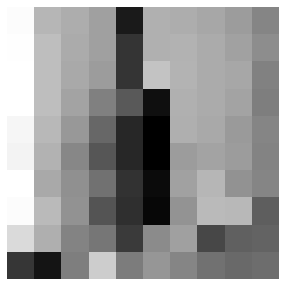

After Bilinear Interpolation:(128, 128)


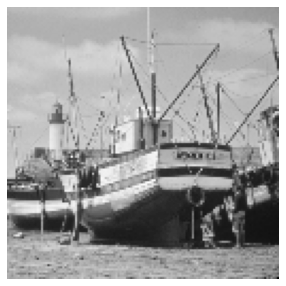

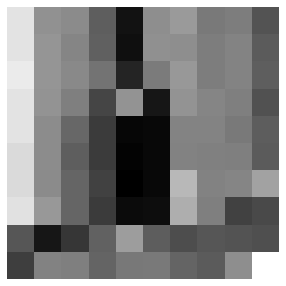

After Nearest Neighbor Interpolation:(32, 32)


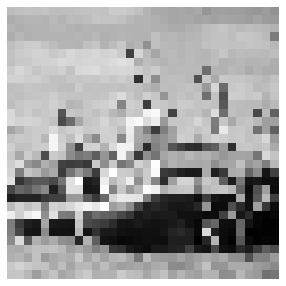

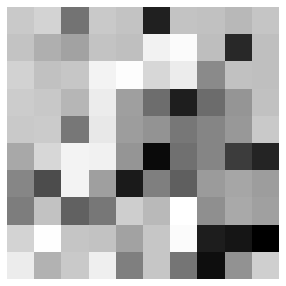

After Bilinear Interpolation:(32, 32)


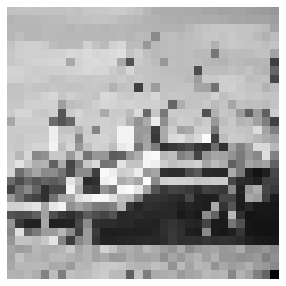

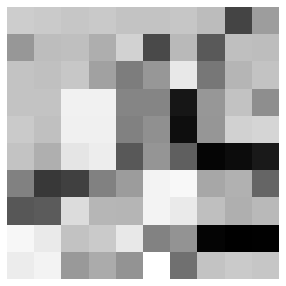

After Nearest Neighbor Interpolation:(1024, 512)


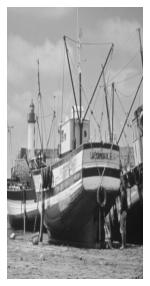

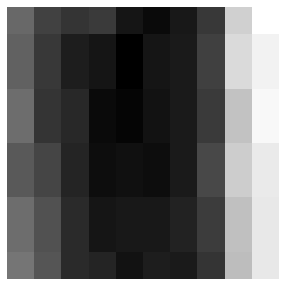

After Bilinear Interpolation:(1024, 512)


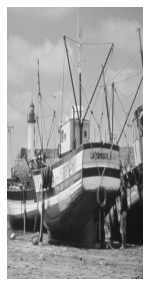

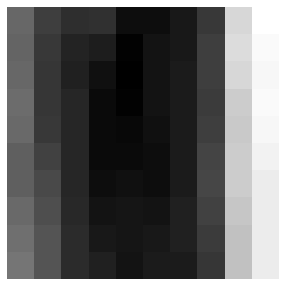

After Nearest Neighbor Interpolation:(128, 128)
After Nearest Neighbor Interpolation:(256, 512)
boat_256x512_nearest_neighbor.jpg


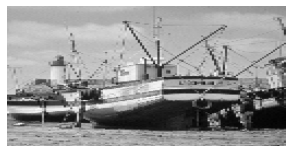

boat_256x512_nearest_neighbor_center.jpg


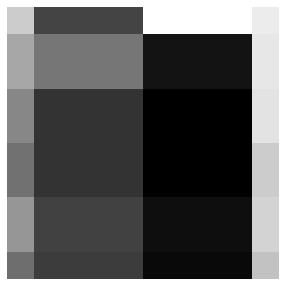

After Bilinear Interpolation:(128, 128)
After Bilinear Interpolation:(256, 512)
boat_256x512_bilinear.jpg


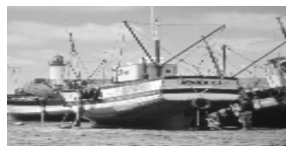

boat_256x512_bilinear_center.jpg


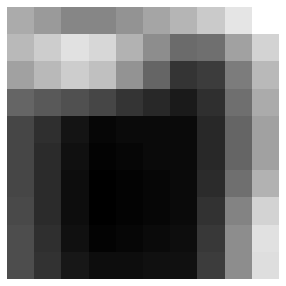

After Nearest Neighbor Interpolation:(32, 32)
After Nearest Neighbor Interpolation:(512, 512)
boat_512x512_nearest_neighbor.jpg


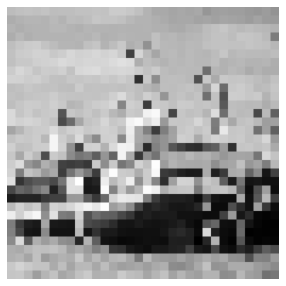

boat_512x512_nearest_neighbor_center.jpg


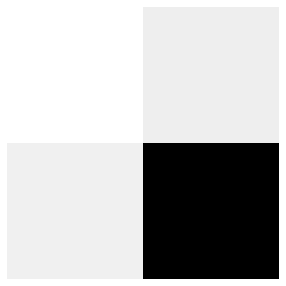

After Bilinear Interpolation:(32, 32)
After Bilinear Interpolation:(512, 512)
boat_512x512_bilinear.jpg


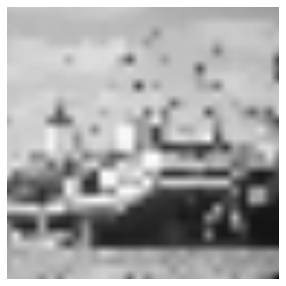

boat_512x512_bilinear_center.jpg


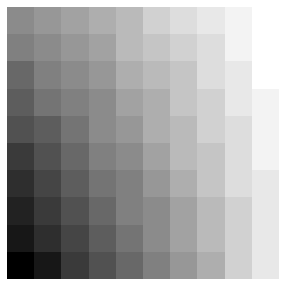

After Nearest Neighbor Interpolation:(128, 128)


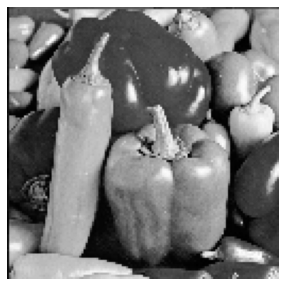

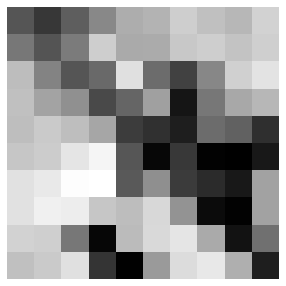

After Bilinear Interpolation:(128, 128)


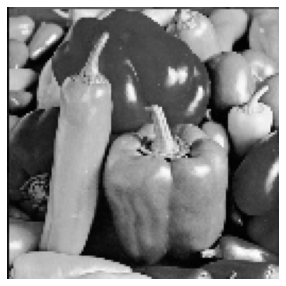

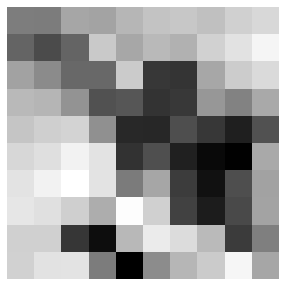

After Nearest Neighbor Interpolation:(32, 32)


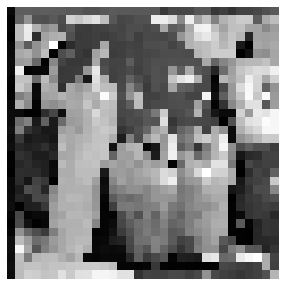

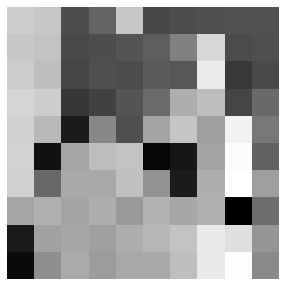

After Bilinear Interpolation:(32, 32)


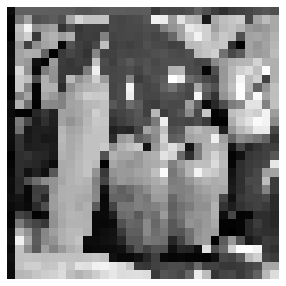

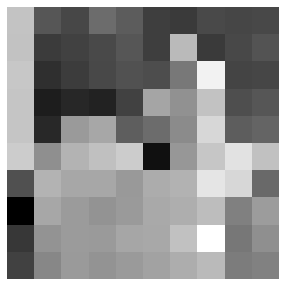

After Nearest Neighbor Interpolation:(1024, 512)


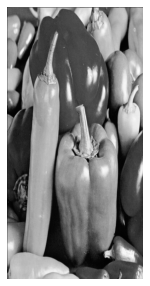

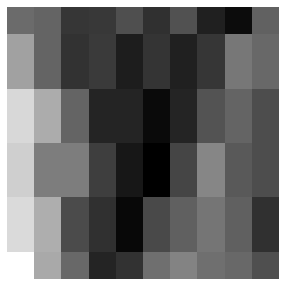

After Bilinear Interpolation:(1024, 512)


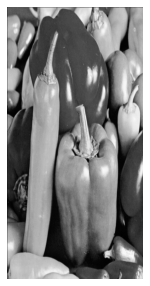

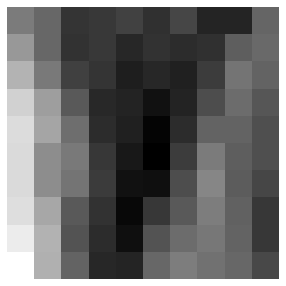

After Nearest Neighbor Interpolation:(128, 128)
After Nearest Neighbor Interpolation:(256, 512)
peppers_256x512_nearest_neighbor.jpg


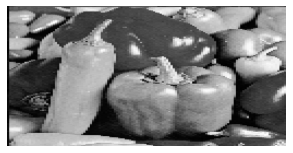

peppers_256x512_nearest_neighbor_center.jpg


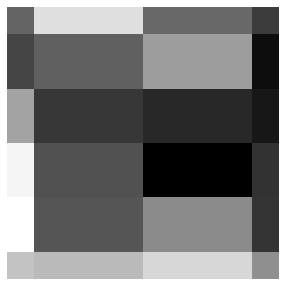

After Bilinear Interpolation:(128, 128)
After Bilinear Interpolation:(256, 512)
peppers_256x512_bilinear.jpg


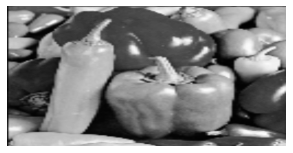

peppers_256x512_bilinear_center.jpg


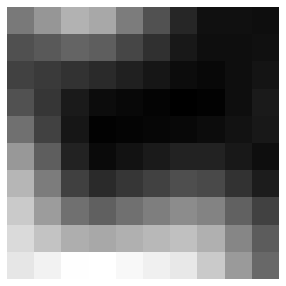

After Nearest Neighbor Interpolation:(32, 32)
After Nearest Neighbor Interpolation:(512, 512)
peppers_512x512_nearest_neighbor.jpg


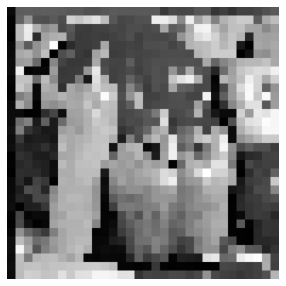

peppers_512x512_nearest_neighbor_center.jpg


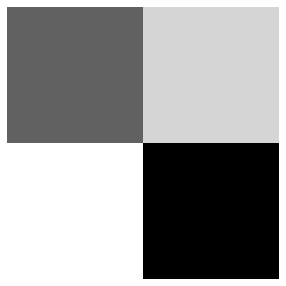

After Bilinear Interpolation:(32, 32)
After Bilinear Interpolation:(512, 512)
peppers_512x512_bilinear.jpg


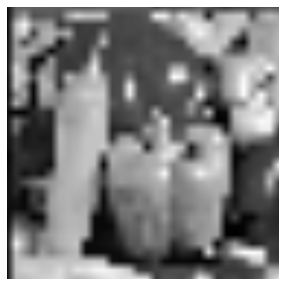

peppers_512x512_bilinear_center.jpg


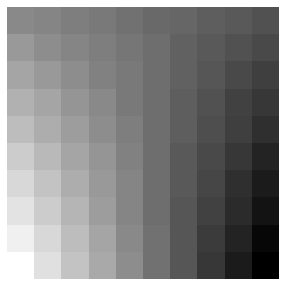

After Nearest Neighbor Interpolation:(128, 128)


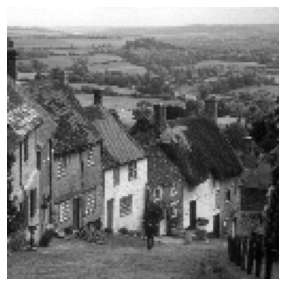

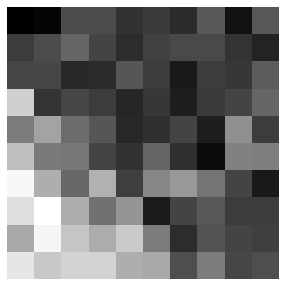

After Bilinear Interpolation:(128, 128)


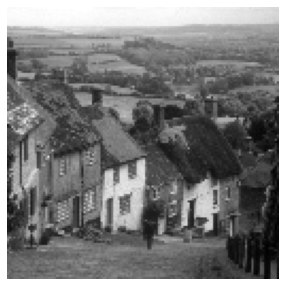

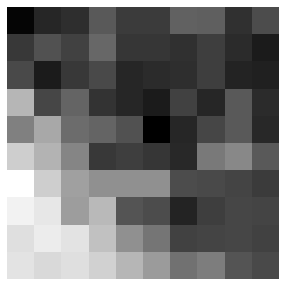

After Nearest Neighbor Interpolation:(32, 32)


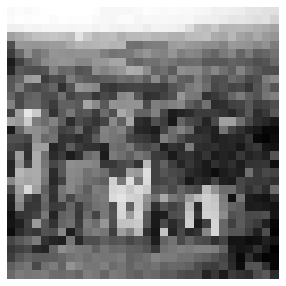

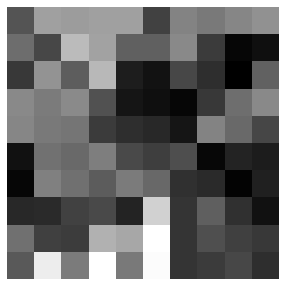

After Bilinear Interpolation:(32, 32)


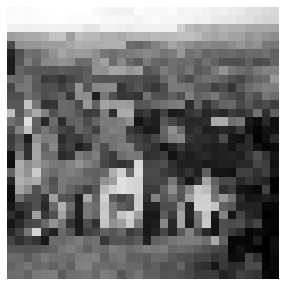

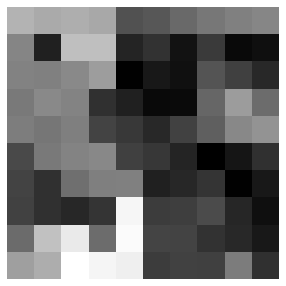

After Nearest Neighbor Interpolation:(1024, 512)


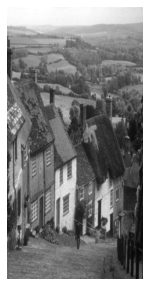

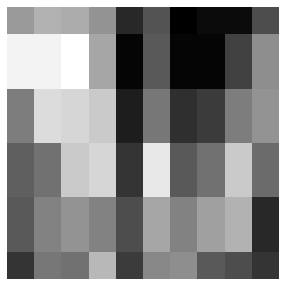

After Bilinear Interpolation:(1024, 512)


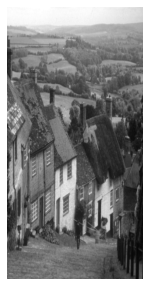

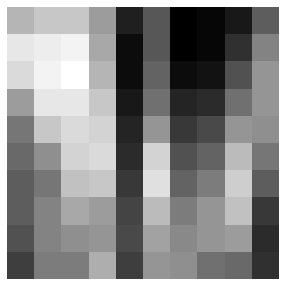

After Nearest Neighbor Interpolation:(128, 128)
After Nearest Neighbor Interpolation:(256, 512)
goldhill_256x512_nearest_neighbor.jpg


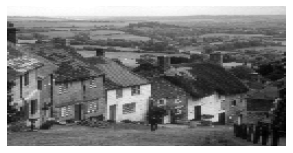

goldhill_256x512_nearest_neighbor_center.jpg


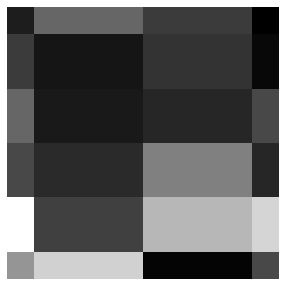

After Bilinear Interpolation:(128, 128)
After Bilinear Interpolation:(256, 512)
goldhill_256x512_bilinear.jpg


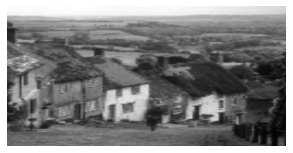

goldhill_256x512_bilinear_center.jpg


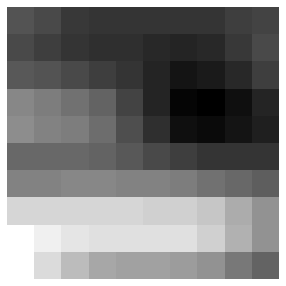

After Nearest Neighbor Interpolation:(32, 32)
After Nearest Neighbor Interpolation:(512, 512)
goldhill_512x512_nearest_neighbor.jpg


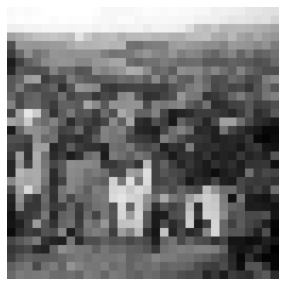

goldhill_512x512_nearest_neighbor_center.jpg


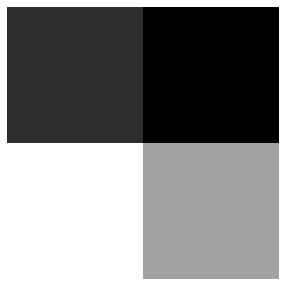

After Bilinear Interpolation:(32, 32)
After Bilinear Interpolation:(512, 512)
goldhill_512x512_bilinear.jpg


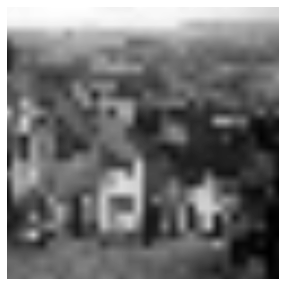

goldhill_512x512_bilinear_center.jpg


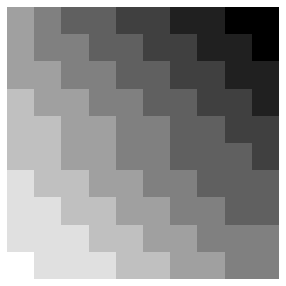

After Nearest Neighbor Interpolation:(128, 128)


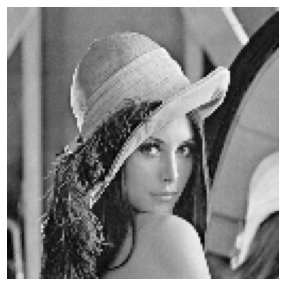

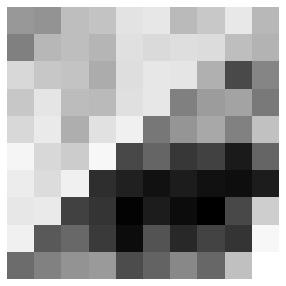

After Bilinear Interpolation:(128, 128)


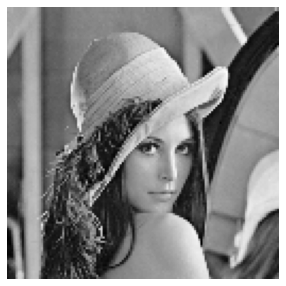

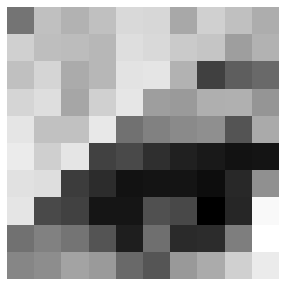

After Nearest Neighbor Interpolation:(32, 32)


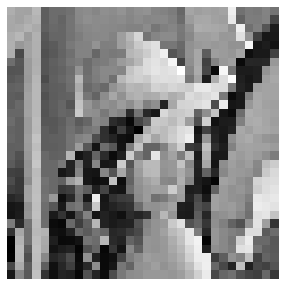

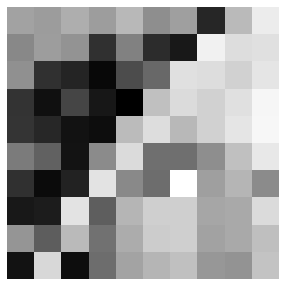

After Bilinear Interpolation:(32, 32)


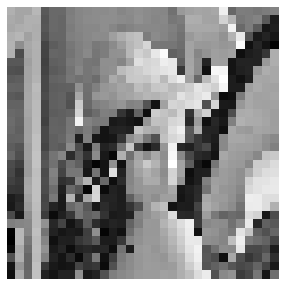

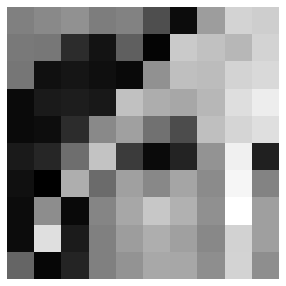

After Nearest Neighbor Interpolation:(1024, 512)


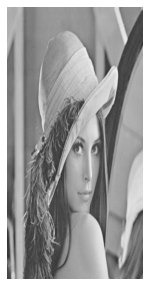

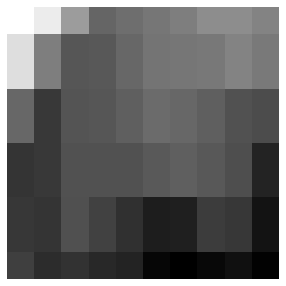

After Bilinear Interpolation:(1024, 512)


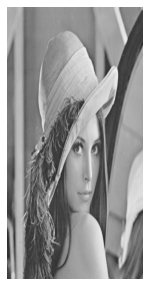

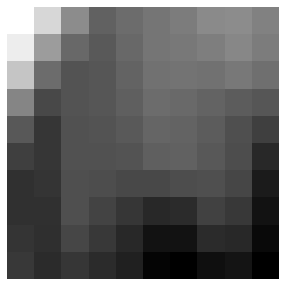

After Nearest Neighbor Interpolation:(128, 128)
After Nearest Neighbor Interpolation:(256, 512)
lena_256x512_nearest_neighbor.jpg


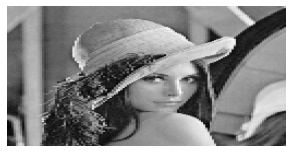

lena_256x512_nearest_neighbor_center.jpg


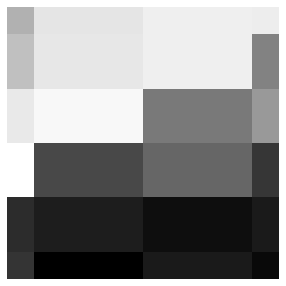

After Bilinear Interpolation:(128, 128)
After Bilinear Interpolation:(256, 512)
lena_256x512_bilinear.jpg


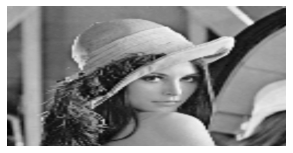

lena_256x512_bilinear_center.jpg


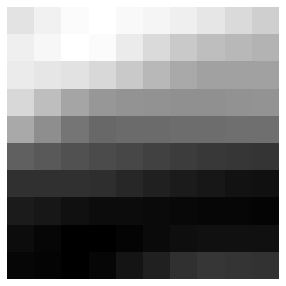

After Nearest Neighbor Interpolation:(32, 32)
After Nearest Neighbor Interpolation:(512, 512)
lena_512x512_nearest_neighbor.jpg


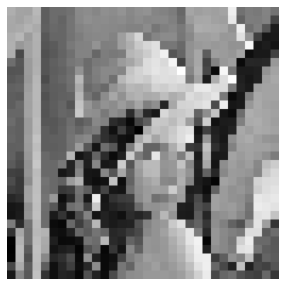

lena_512x512_nearest_neighbor_center.jpg


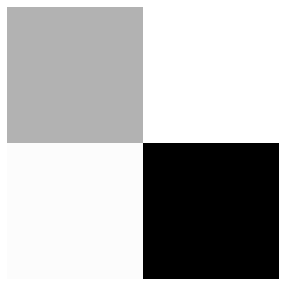

After Bilinear Interpolation:(32, 32)
After Bilinear Interpolation:(512, 512)
lena_512x512_bilinear.jpg


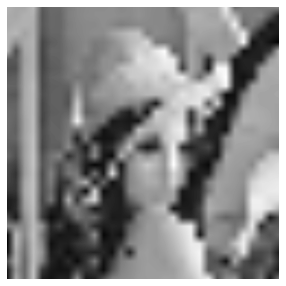

lena_512x512_bilinear_center.jpg


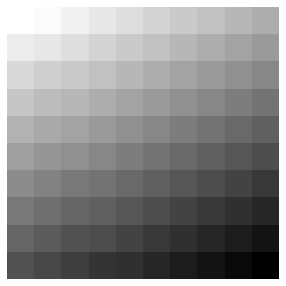

In [17]:
import math

class JJCV_Rescale(JJCV_Read_Draw):
        """
        ## Description
        JJCV_Rescale() is used for rescaling image
        Input: cmap

        ## Public methods:
        1. five_steps
            Input 
                (String) img_path
                (String) mode
            Output
                pass
                
        ## Private methods:
        1. private_quick_print
            Input
                (Integer) width
                (Integer) height
                (String) mode
                (Boolean) center
                (String) name
            Output
                (String) print)out
        
        2. private_image_rescale
            Input
                (Numpy Array) img_ori
                (Tuple) target
                (String) mode
            Output
                (Numpy Array) img_resize
        """
        def __init__(self, cmap):
                super().__init__(cmap)
                
        def five_steps(self, img_path, mode):
            
                # 0. Read
                img = self.common_read(img_path, mode)
                
                # 1. 512x512 -> 128x128
                # 2. 512x512 -> 32x32
                # 3. 512x512 -> 1024x512
                for w_h in [(128, 128), (32, 32), (1024,512)]:
                        for mode in ["nearest_neighbor", "bilinear"]:
                                img_rescale = self.private_image_rescale(img, w_h, mode)
                                #path_img = self.private_quick_print(w_h[0],w_h[1],mode,False, fname[:-4]) 
                                #cv.imwrite(path_img, img_rescale)
                                self.common_draw(img_rescale, True)
                                
                                #path_center = self.private_quick_print(w_h[0],w_h[1],mode,True, fname[:-4])
                                img_center = self.private_get_center_area_2(img_rescale, w_h[0], w_h[1], 10)
                                self.common_draw(img_center, True)
                                #cv.imwrite(path_center, img_center)

                # 4. 128x128 -> 256x512
                for mode in ["nearest_neighbor", "bilinear"]:
                        img_128_128 = self.private_image_rescale(img, (128,128), mode)
                        img_256_512 = self.private_image_rescale(img_128_128, (256,512), mode)
                        path_img = self.private_quick_print(256,512,mode,False, fname[:-4])
                        self.common_draw(img_256_512, True)
                        #cv.imwrite(path_img, img_256_512)

                        path_center = self.private_quick_print(256,512,mode,True, fname[:-4])
                        img_center = self.private_get_center_area_2(img_256_512, 256, 512, 10)
                        self.common_draw(img_center, True)
                        #cv.imwrite(path_center, img_center)
                             
                # 5. 32x32 -> 512x512
                for mode in ["nearest_neighbor", "bilinear"]:
                        img_32_32 = self.private_image_rescale(img, (32,32), mode)
                        img_512x512 = self.private_image_rescale(img_32_32, (512,512), mode)
                        path_img = self.private_quick_print(512,512,mode,False, fname[:-4])
                        self.common_draw(img_512x512, True)
                        #cv.imwrite(path_img, img_512x512)
                        
                        path_center = self.private_quick_print(512,512,mode,True, fname[:-4])
                        img_center = self.private_get_center_area_2(img_512x512, 512, 512, 10)
                        self.common_draw(img_center, True)
                        #cv.imwrite(path_center, img_center)
           




        def private_quick_print(self,width, height, mode, center, name):
                if center:
                        print_out = f"{name[17:]}_{width}x{height}_{mode}_center.jpg"
                else:
                        print_out = f"{name[17:]}_{width}x{height}_{mode}.jpg"
                print(print_out)
                return print_out              
                        
        def private_image_rescale(self, img_ori, target, mode):
                target_h, target_w = target
                ori_h, ori_w = img_ori.shape

                h_scale = float(target_h)/(ori_h)
                w_scale = float(target_w)/(ori_w)
                x_ratio = float(ori_w-1) / (target_w-1) if target_w > 1 else 0
                y_ratio = float(ori_h-1) / (target_h-1) if target_h > 1 else 0

                img_resize = np.empty((target_h, target_w), np.uint8)

                if mode == "nearest_neighbor":
                        for y in range(target_h):
                                for x in range(target_w):
                                        img_resize[y,x] = img_ori[int(y/h_scale), int(x/w_scale)]

                        print(f"After Nearest Neighbor Interpolation:{target}")

                elif mode == "bilinear":
                        for y in range(target_h):
                                for x in range(target_w):

                                        x_l, y_l = math.floor(x_ratio * x), math.floor(y_ratio * y)
                                        x_h, y_h = math.ceil(x_ratio * x), math.ceil(y_ratio * y)

                                        x_weight = (x_ratio * x) - x_l
                                        y_weight = (y_ratio * y) - y_l

                                        a = img_ori[y_l, x_l]
                                        b = img_ori[y_l, x_h]
                                        c = img_ori[y_h, x_l]
                                        d = img_ori[y_h, x_h]

                                        pixel = a * (1 - x_weight) * (1 - y_weight) 
                                        pixel = pixel + b * x_weight * (1 - y_weight)
                                        pixel = pixel + c * y_weight * (1 - x_weight)
                                        pixel = pixel + d * x_weight * y_weight

                                        img_resize[y][x] = pixel

                        print(f"After Bilinear Interpolation:{img_resize.shape}")

                return img_resize

jjcv_rescale = JJCV_Rescale(cmap="gray")

for fname in FILENAME_LIST:
    fname = f"{BASE_DIR}{fname}"
    mode = fname[-3:]
    jjcv_rescale.five_steps(fname, mode)